<a href="https://colab.research.google.com/github/Bisi-insights/Loan-Approval-Prediction/blob/main/Loan_Approval_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.tree import DecisionTreeClassifier

print("\n All libraries imported successfully")


 All libraries imported successfully


In [115]:
from google.colab import drive
drive.mount('/content/drive')
loan = pd.read_csv('/content/drive/MyDrive/Loan.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [117]:
loan.isna().sum()/len(loan)*100

,0
ApplicationDate,0.0
Age,0.0
AnnualIncome,0.0
CreditScore,0.0
EmploymentStatus,0.0
EducationLevel,0.0
Experience,0.0
LoanAmount,0.0
LoanDuration,0.0
MaritalStatus,0.0


In [118]:
loan.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [119]:
loan.dtypes

,0
ApplicationDate,object
Age,int64
AnnualIncome,int64
CreditScore,int64
EmploymentStatus,object
EducationLevel,object
Experience,int64
LoanAmount,int64
LoanDuration,int64
MaritalStatus,object


In [120]:
loan.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


### Data Preprocessing

In [121]:
#dropped ApplicateDate as it offers no insight

loan = loan.drop(['ApplicationDate'], axis=1)

In [122]:
#View Value Counts of All Variables
for col in loan.select_dtypes(include=['object']).columns:
    print(f"Value counts for {col}:")
    print(loan[col].value_counts())
    print("\n" + "="*40 + "\n")


Value counts for EmploymentStatus:
EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64


Value counts for EducationLevel:
EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64


Value counts for MaritalStatus:
MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64


Value counts for HomeOwnershipStatus:
HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64


Value counts for LoanPurpose:
LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64




In [ ]:
#Created copies of the loan data so I'm able to view the correlation analysis image
loan2 = loan.copy()
loan3 = loan.copy()

In [ ]:
loan2.drop(['BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
       'RiskScore'], axis = 1, inplace = True)

In [ ]:
loan3.drop(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio'], axis = 1, inplace = True)

Index(['BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults',
       'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

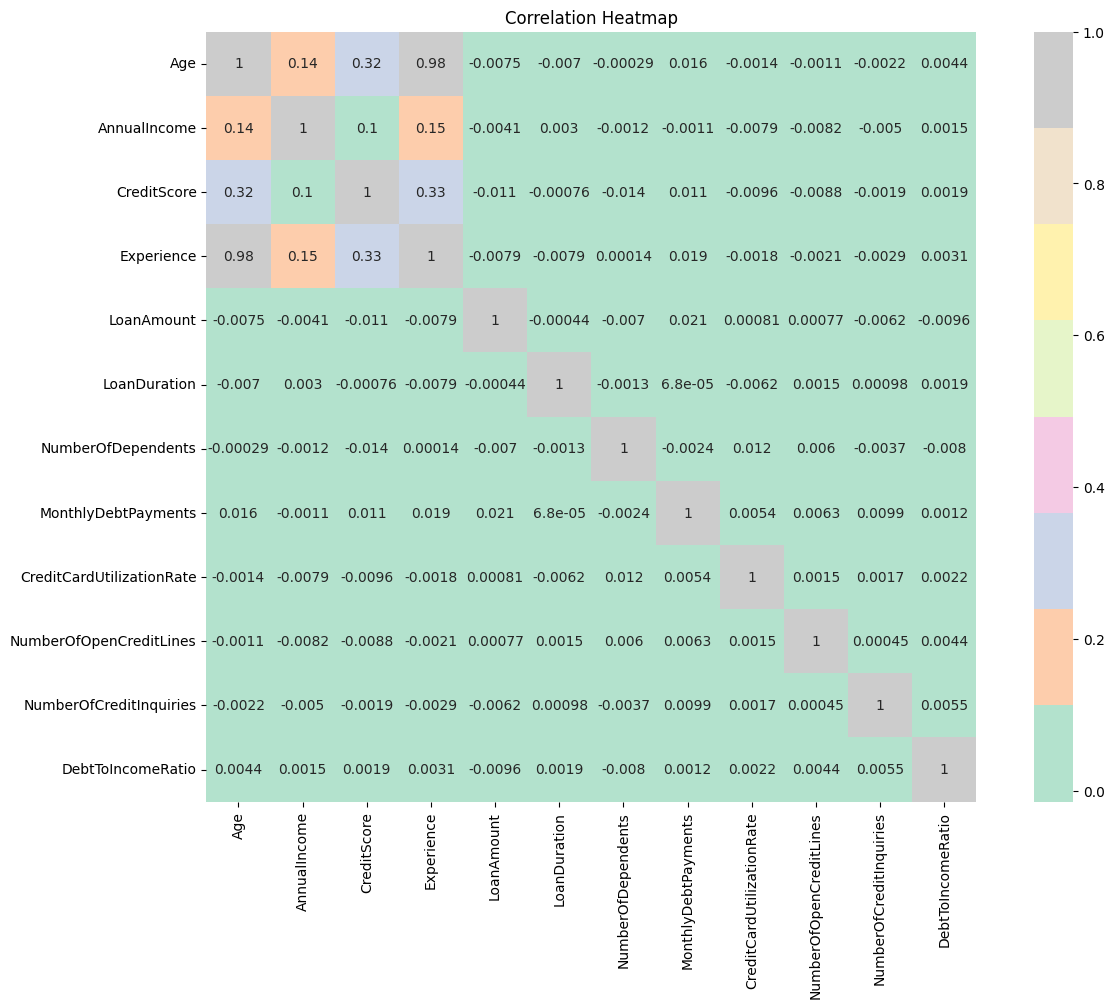

In [123]:
# Variables Correlation
loan_corr = loan2.corr(method='pearson', min_periods=1, numeric_only=True)

# Visualize correlation heatmap
plt.figure(figsize=(15, 10))
plt.title('Correlation Heatmap')
sns.heatmap(loan_corr, annot=True, cmap='Pastel2', square=True)
plt.show()


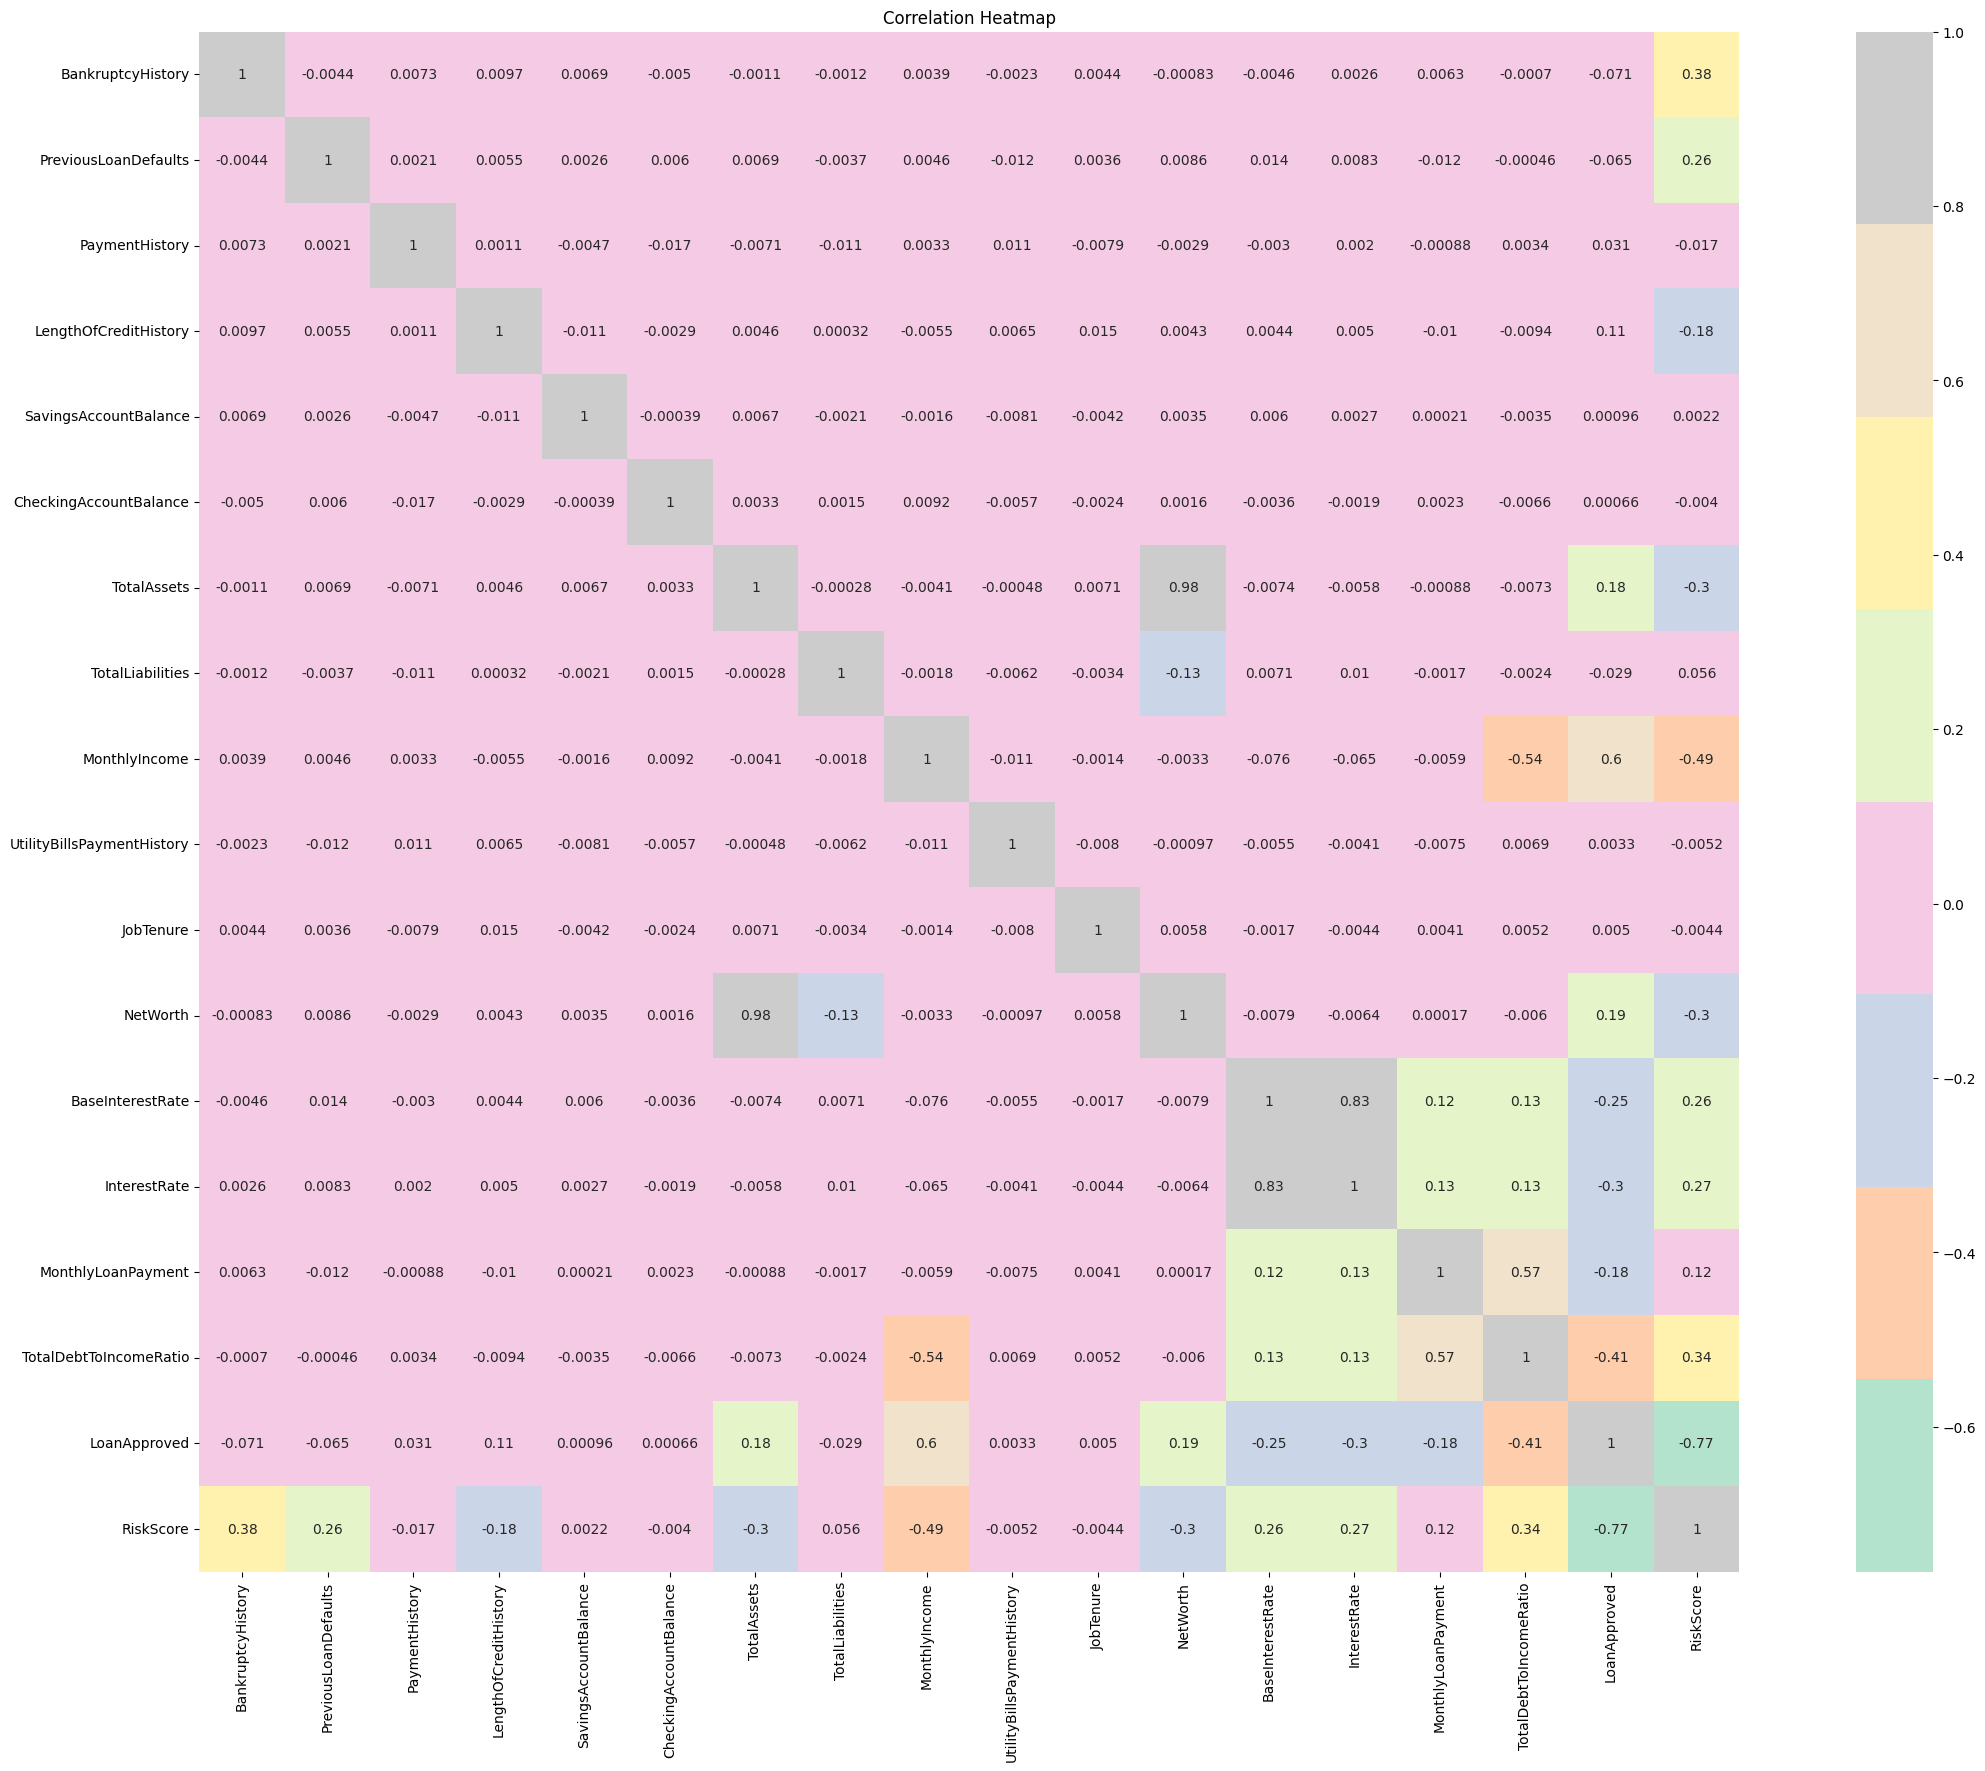

In [125]:
# Variables Correlation
loan_corr2 = loan3.corr(method='pearson', min_periods=1, numeric_only=True)

# Visualize correlation heatmap
plt.figure(figsize=(30, 20))
plt.title('Correlation Heatmap')
sns.heatmap(loan_corr2, annot=True, cmap='Pastel2', square=True)
plt.show()


### Drop highly correlated variables

In [ ]:
loan = loan.drop(['Experience', 'TotalAssets', 'BaseInterestRate'], axis = 1)

In [ ]:
#recheck data information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   LoanAmount                  20000 non-null  int64  
 6   LoanDuration                20000 non-null  int64  
 7   MaritalStatus               20000 non-null  object 
 8   NumberOfDependents          20000 non-null  int64  
 9   HomeOwnershipStatus         20000 non-null  object 
 10  MonthlyDebtPayments         20000 non-null  int64  
 11  CreditCardUtilizationRate   20000 non-null  float64
 12  NumberOfOpenCreditLines     20000 non-null  int64  
 13  NumberOfCreditInquiries     200

###Exploratory Data Analysis

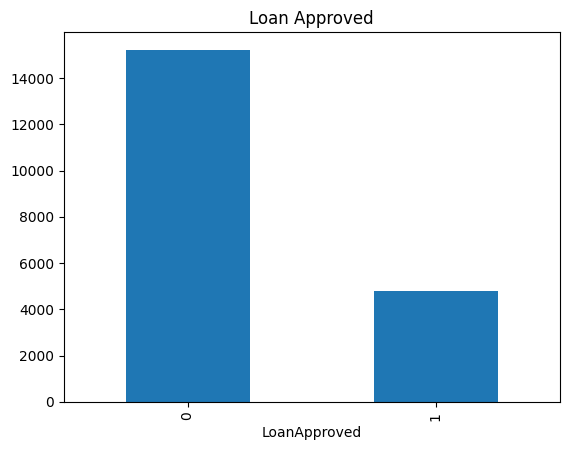

In [126]:
loan.LoanApproved.value_counts().plot(kind='bar')
plt.title('Loan Approved')
plt.show()

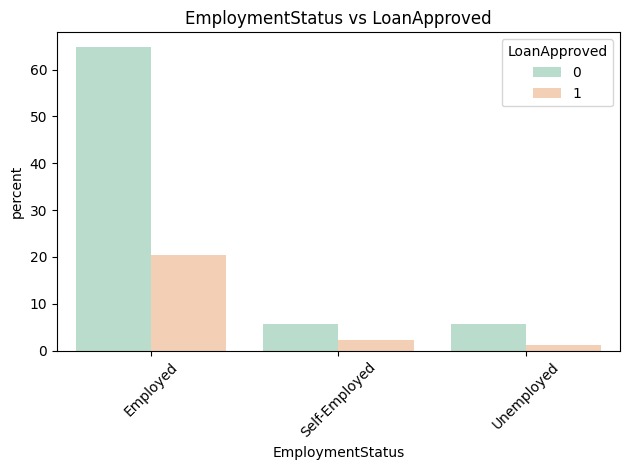

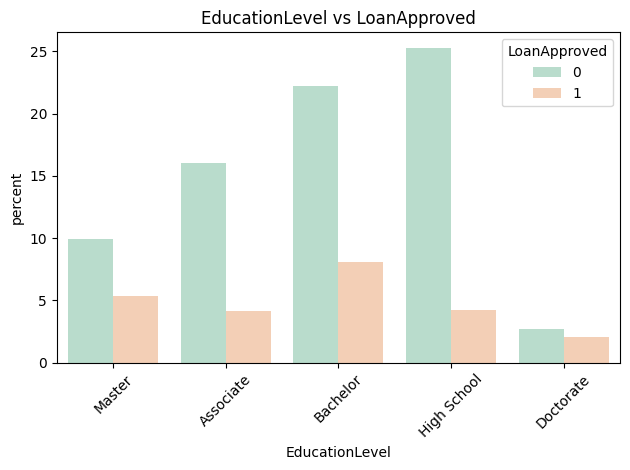

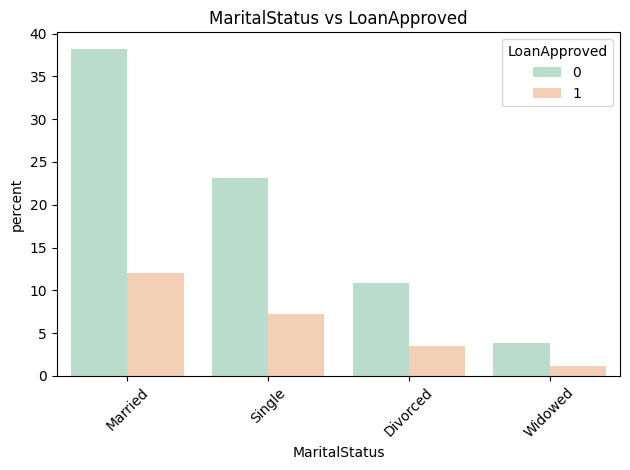

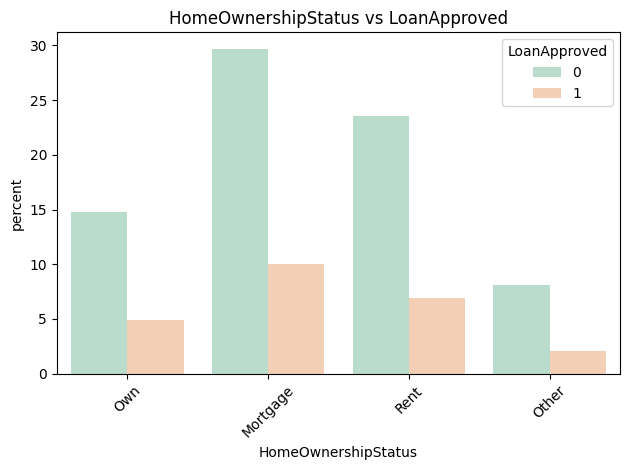

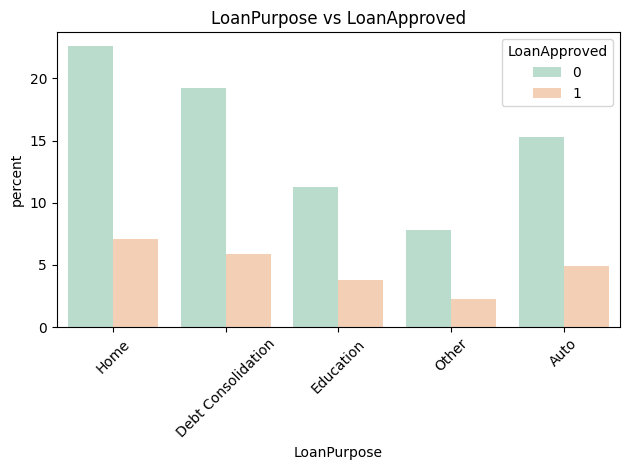

In [131]:
# Bar plots for categorical features vs target
categorical_features = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
for feature in categorical_features:
    sns.countplot(data = loan, x = feature, hue='LoanApproved', stat = 'percent', palette = 'Pastel2')
    plt.title(f'{feature} vs LoanApproved')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


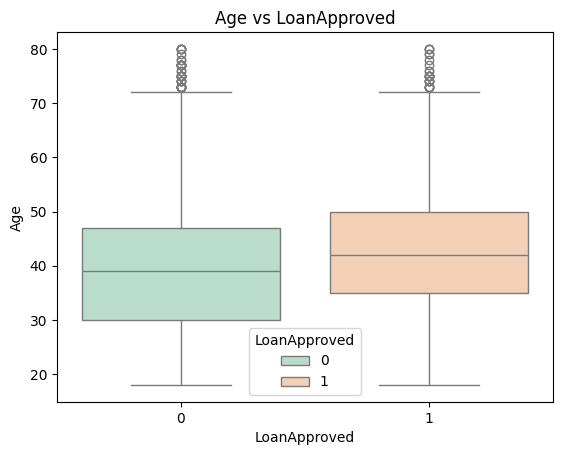

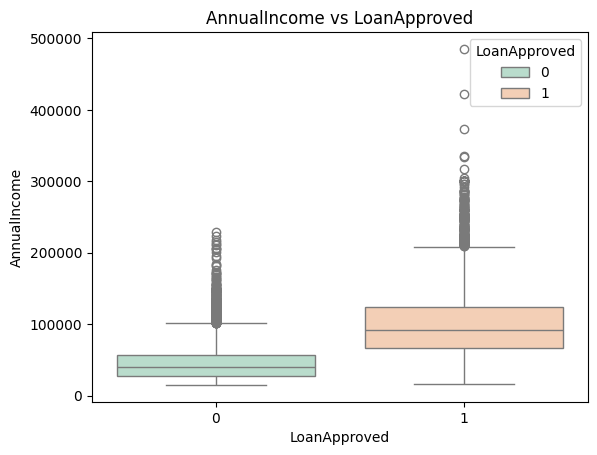

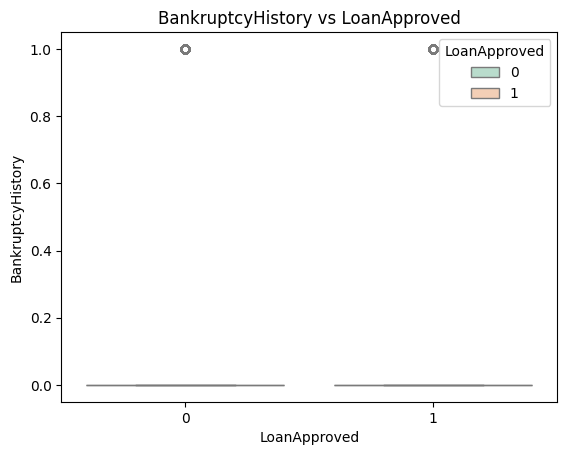

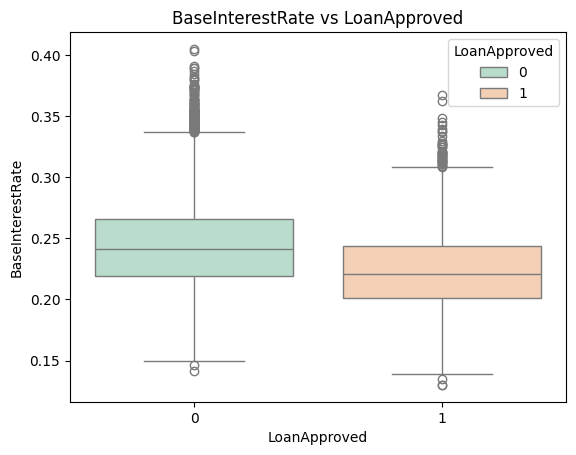

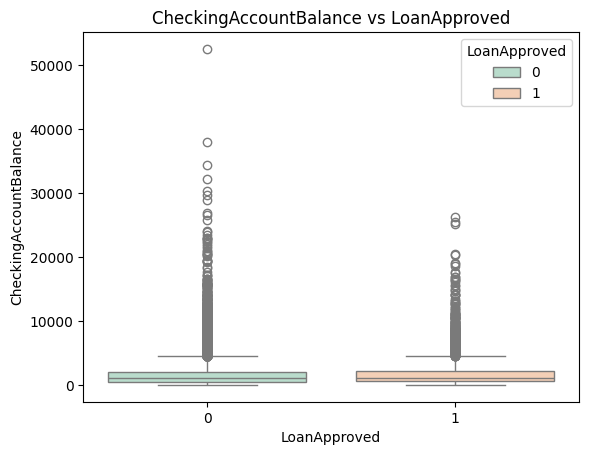

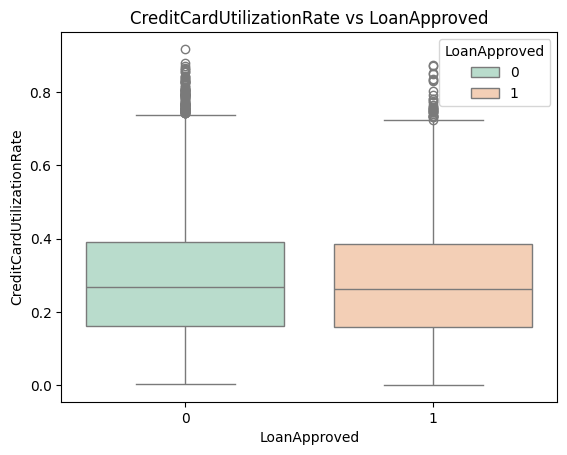

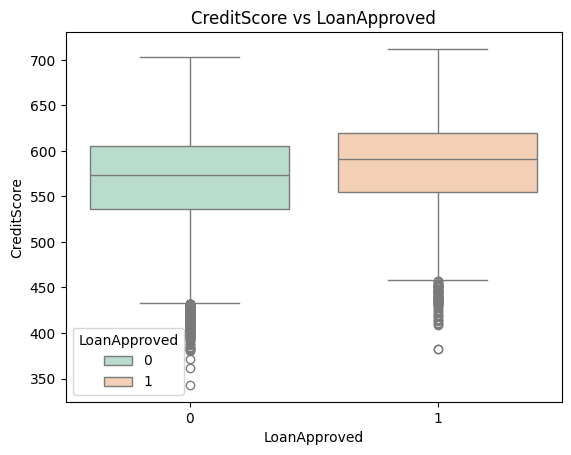

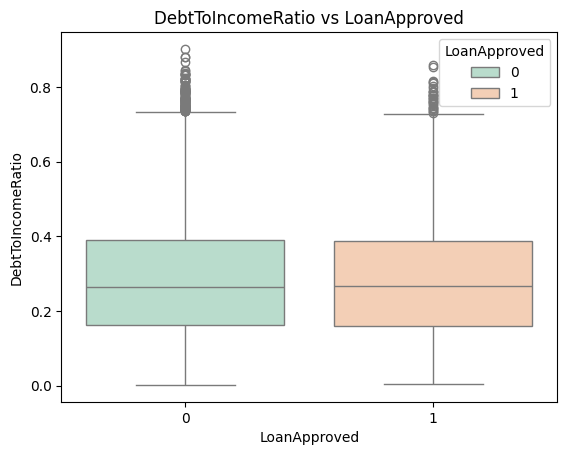

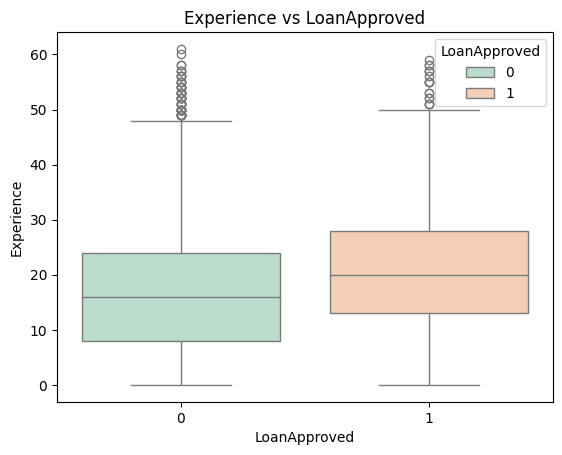

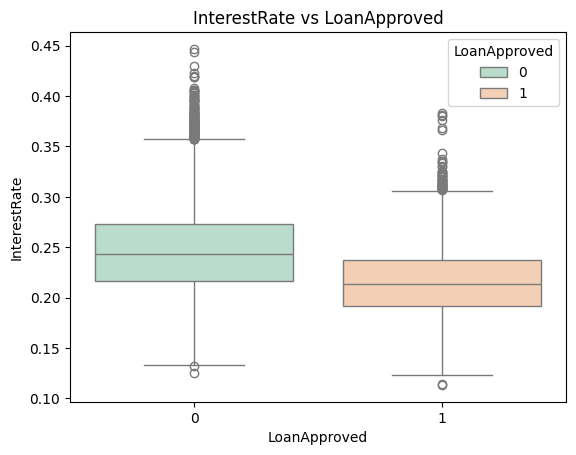

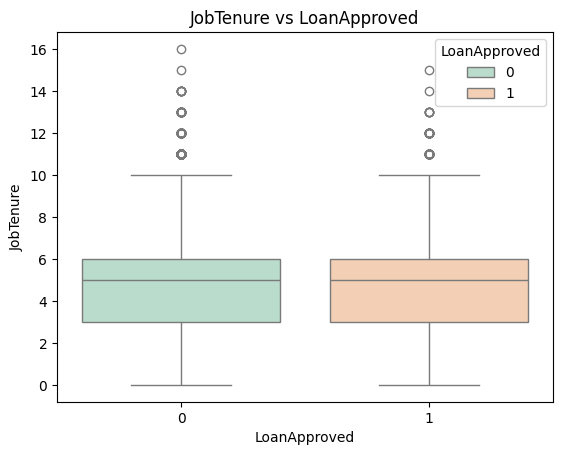

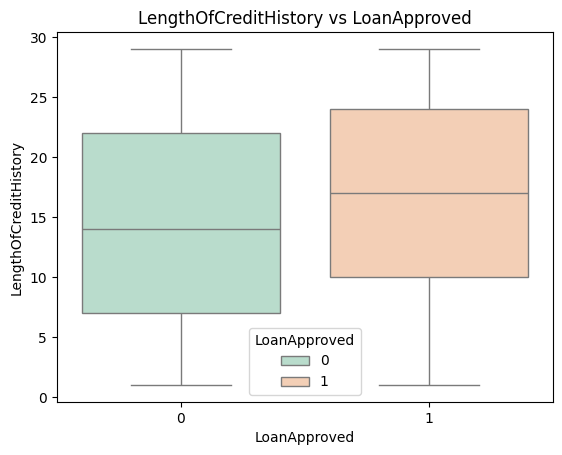

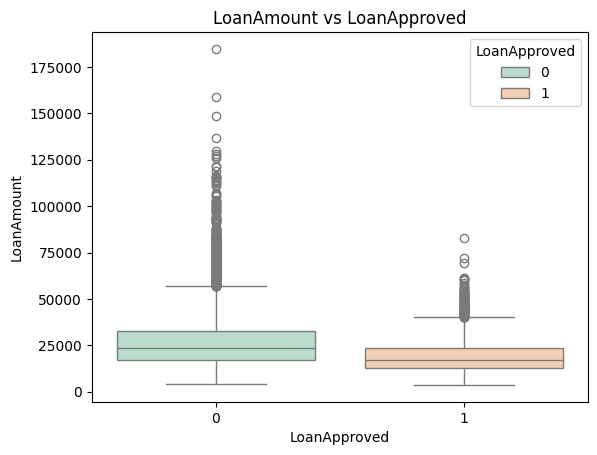

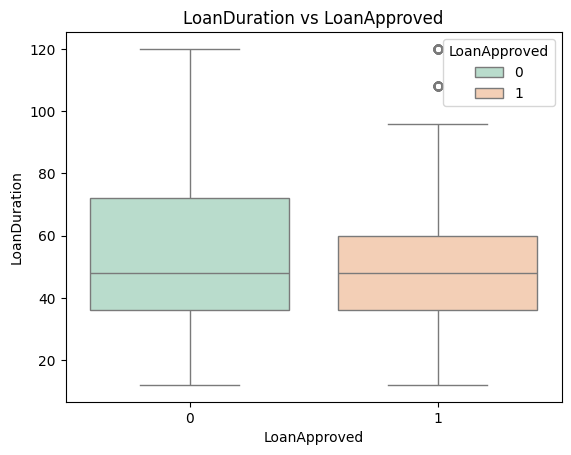

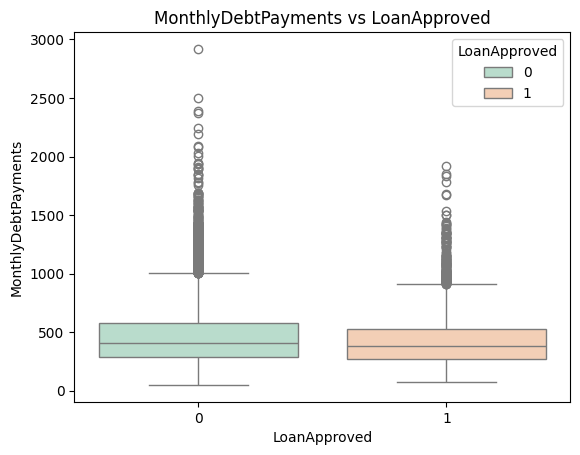

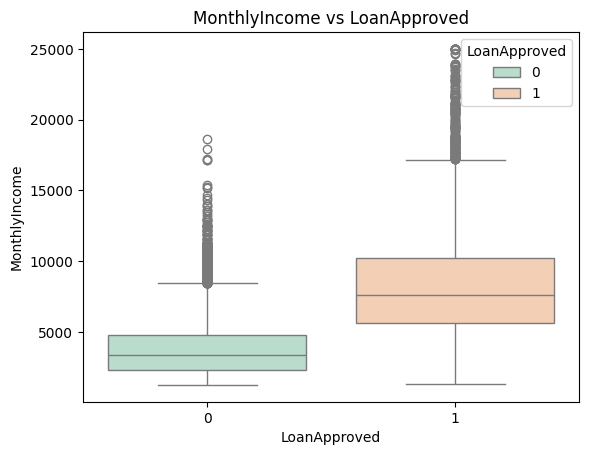

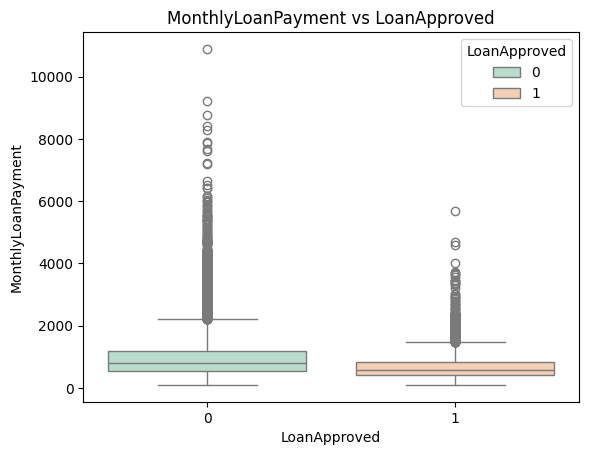

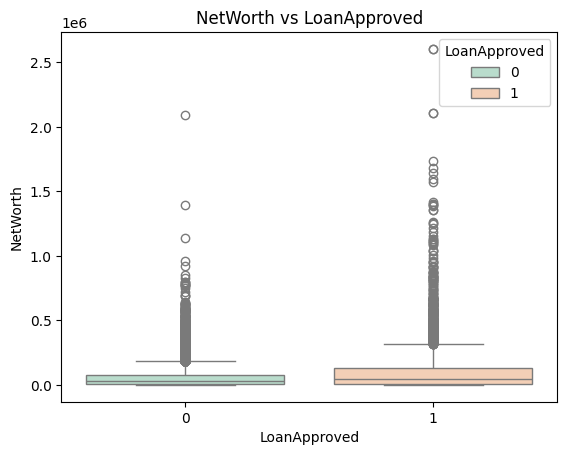

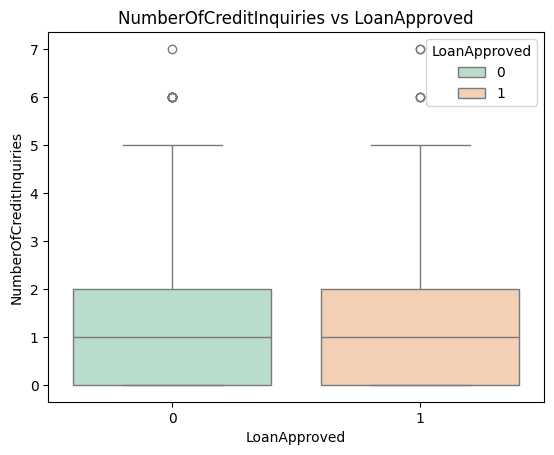

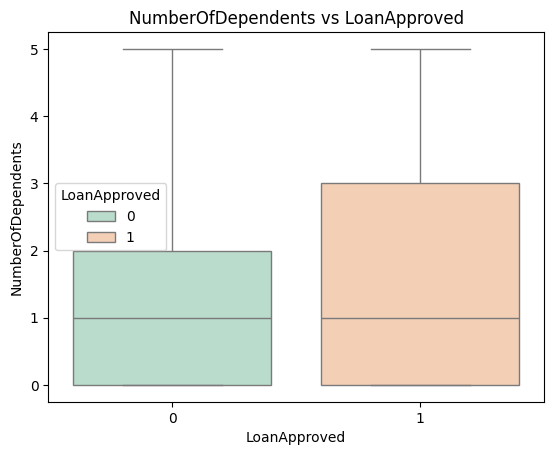

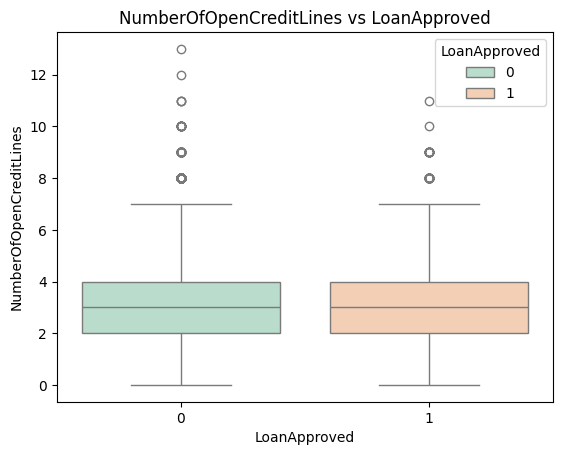

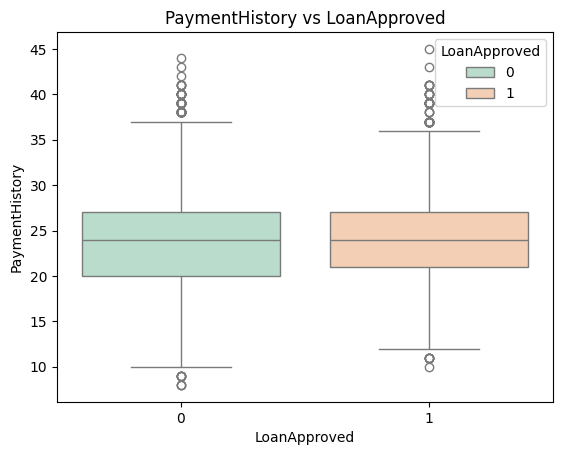

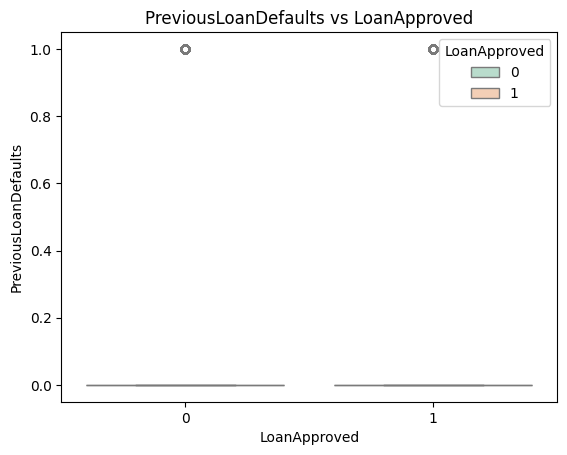

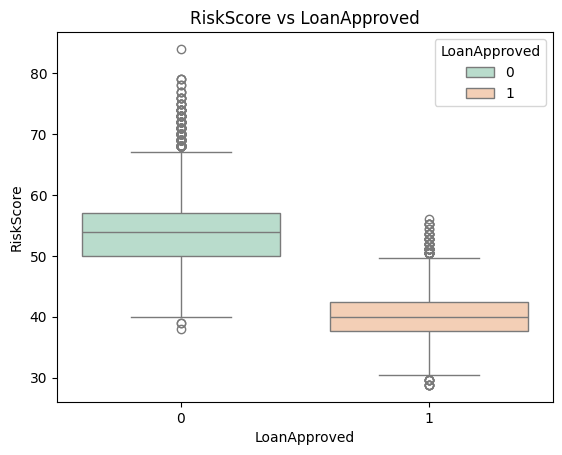

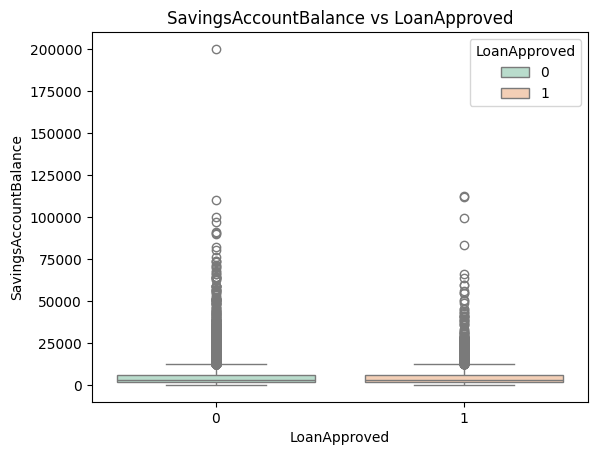

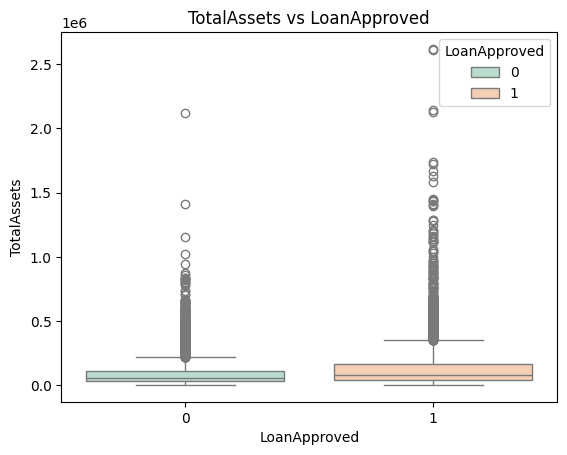

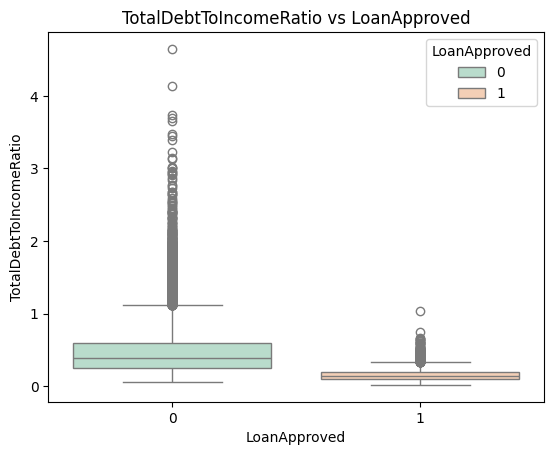

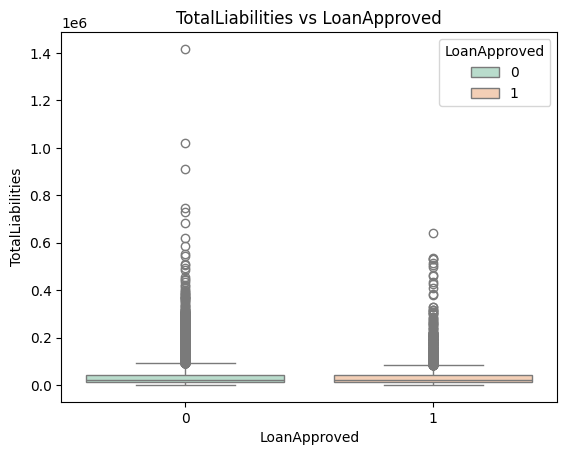

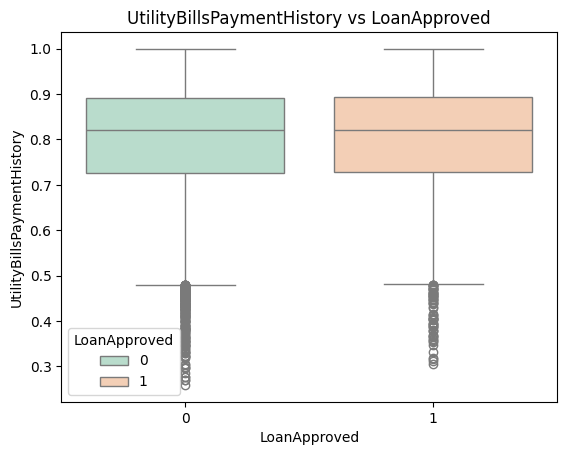

In [134]:
numeric_features = loan.select_dtypes(include=['int64', 'float64']).columns.difference(['LoanApproved'])

for feature in numeric_features:
    sns.boxplot(x='LoanApproved', y=feature, data=loan, hue='LoanApproved', palette = 'Pastel2')
    plt.title(f'{feature} vs LoanApproved')
    plt.show()


### I decided not to review the outliers, due to the diversity of real life audience

### Training and Testing of Loan

In [135]:
#creating dummies for the categorical features
categorical_features = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
loan = pd.get_dummies(loan, columns=categorical_features, drop_first=True)



In [136]:
train, test = train_test_split(loan, test_size=0.2, random_state=42)

In [137]:
X_train = train.drop('LoanApproved', axis=1)
y_train = train['LoanApproved']
X_test = test.drop('LoanApproved', axis=1)
y_test = test['LoanApproved']

In [138]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16000, 45), (16000,), (4000, 45), (4000,))

###Model Selection - Decision Tree: I chose a Decision Tree for its effectiveness with categorical targets and its provision for ensemble methods if needed

In [139]:
#Train the model using Decision Tree
loan_tree = DecisionTreeClassifier(random_state=42)
loan_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Review Important Features
feature_importances = loan_tree.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [140]:
feature_importances_df

,Feature,Importance
25,RiskScore,0.854792
10,DebtToIncomeRatio,0.055739
24,TotalDebtToIncomeRatio,0.045059
2,CreditScore,0.009139
11,BankruptcyHistory,0.007932
12,PreviousLoanDefaults,0.005484
21,NetWorth,0.005216
22,InterestRate,0.003399
18,MonthlyIncome,0.001960
7,CreditCardUtilizationRate,0.001877


In [ ]:
loan_tree_pred = loan_tree.predict(X_test)
loan_tree_pred  = pd.DataFrame(loan_tree_pred, columns=['LoanApproved'])
loan_tree_pred

,LoanApproved
0,1
1,1
2,0
3,0
4,0
...,...
3995,1
3996,0
3997,0
3998,0


In [141]:
#Print Classification Report

print(classification_report(y_test, loan_tree_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2983
           1       0.98      0.98      0.98      1017

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

